In [1]:
import sys
import numpy
import meshio

from dolfin import (MPI, MeshValueCollection, cpp, plotting)
%matplotlib inline

In [2]:
import gmsh

In [319]:
# Map from gmsh to type that is also used by meshio
mapping = {1: 'line',
           2: 'triangle',
           4: 'tetra',
           8: 'line3',
           9: 'triangle6',
           11: 'tetra10',
           15: 'vertex'
           }
nodes = {'line': 2,
         'triangle': 3,
         'tetra': 4,
         'line3': 3,
         'triangle6': 6,
         'tetra10': 10,
         'vertex': 1
         }

# Generate mesh
mesh_ele_size = 0.2

gmsh.initialize(sys.argv)
gmsh.model.add('unit_square')
gmsh.model.geo.addPoint(0.0, 0.0, 0.0, mesh_ele_size, 1)
gmsh.model.geo.addPoint(1.0, 0.0, 0.0, mesh_ele_size, 2)
gmsh.model.geo.addPoint(1.0, 1.0, 0.0, mesh_ele_size, 3)
gmsh.model.geo.addPoint(0.0, 1.0, 0.0, mesh_ele_size, 4)

gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 1, 4)

gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 1)
gmsh.model.geo.addPlaneSurface([1], 6)

gmsh.model.addPhysicalGroup(1, [1], 1)
gmsh.model.setPhysicalName(1, 1, "BOTTOM")

gmsh.model.addPhysicalGroup(1, [3], 2)
gmsh.model.setPhysicalName(1, 2, "TOP")

gmsh.model.addPhysicalGroup(1, [4], 3)
gmsh.model.setPhysicalName(1, 3, "LEFT")

gmsh.model.addPhysicalGroup(1, [2], 4)
gmsh.model.setPhysicalName(1, 4, "RIGHT")

gmsh.model.addPhysicalGroup(2, [6], 6)
gmsh.model.setPhysicalName(2, 6, "DOMAIN")

In [320]:
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate()

In [321]:
nodeTags, coord, parametricCoord = gmsh.model.mesh.getNodes()
dim = 3

In [322]:
coord

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.2       ,  0.        ,  0.        ,
        0.4       ,  0.        ,  0.        ,  0.6       ,  0.        ,
        0.        ,  0.8       ,  0.        ,  0.        ,  1.        ,
        0.2       ,  0.        ,  1.        ,  0.4       ,  0.        ,
        1.        ,  0.6       ,  0.        ,  1.        ,  0.8       ,
        0.        ,  0.8       ,  1.        ,  0.        ,  0.6       ,
        1.        ,  0.        ,  0.4       ,  1.        ,  0.        ,
        0.2       ,  1.        ,  0.        ,  0.        ,  0.8       ,
        0.        ,  0.        ,  0.6       ,  0.        ,  0.        ,
        0.4       ,  0.        ,  0.        ,  0.2       ,  0.        ,
        0.5       ,  0.5       ,  0.        ,  0.2875    ,  0.7125    ,
        0.        ,  0.7125    ,  0.7125    ,  0.        ,  0.28

In [323]:
# Reshape to get right format
points = numpy.reshape(coord, (int(coord.size / dim), dim))

In [324]:
element_types

array([ 1,  2, 15], dtype=int32)

In [325]:
gmsh.model.mesh.getElements(1,2)

(array([1], dtype=int32),
 [array([ 6,  7,  8,  9, 10], dtype=uint64)],
 [array([ 2,  9,  9, 10, 10, 11, 11, 12, 12,  3], dtype=uint64)])

# This is the value of field_data without string tag

In [326]:
dim_tags = gmsh.model.getPhysicalGroups(1)

In [327]:
dim_tags

[(1, 1), (1, 2), (1, 3), (1, 4)]

In [328]:
gmsh.model.getPhysicalName(dim_tags[0][0], dim_tags[0][1])

'BOTTOM'

# Cell_data

In [329]:
element_type, element_tag, node_tag = gmsh.model.mesh.getElements(2, 6)

In [330]:
element_type[0]

2

In [331]:
element_tag

[array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88], dtype=uint64)]

In [332]:
node_tag

[array([27, 22, 34, 27, 34, 35, 26, 23, 35, 26, 35, 37, 34, 29, 36, 29, 24,
        36, 36, 28, 37, 28, 25, 37, 18, 19, 29, 14, 15, 27,  6,  7, 28, 10,
        11, 26,  4, 17, 30,  3, 13, 31, 16,  4, 30,  1,  5, 32, 20,  1, 32,
        12,  3, 31,  2,  9, 33,  8,  2, 33, 18, 29, 41, 14, 27, 43,  6, 28,
        44, 10, 26, 45, 26, 25, 45, 27, 23, 43, 23, 26, 40, 28, 24, 44, 29,
        22, 41, 26, 11, 40, 25, 28, 42, 28,  7, 42, 27, 15, 38, 22, 27, 38,
        29, 19, 39, 24, 29, 39, 35, 21, 37, 21, 36, 37, 25, 26, 37, 23, 27,
        35, 24, 28, 36, 22, 29, 34, 34, 21, 35, 21, 34, 36, 15, 16, 38, 17,
        18, 41, 19, 20, 39, 13, 14, 43, 11, 12, 40,  5,  6, 44,  7,  8, 42,
         9, 10, 45, 30, 17, 41, 31, 13, 43, 16, 30, 38, 32,  5, 44, 20, 32,
        39, 12, 31, 40, 33,  9, 45,  8, 33, 42, 30, 22, 38, 31, 23, 40, 32,
        24, 39, 22, 30, 41, 23, 31, 43, 33, 25, 42, 24, 32, 44, 25, 33, 45], dtype=uint64)]

In [333]:
for dim_tag in dim_tags:
    dim = dim_tag[0]
    tag = dim_tag[1]
    element_type, element_tag, node_tag = gmsh.model.mesh.getElements(dim, tag)
    for num in element_tag[0]:
        element_tags[dim - 1][element_tags[dim - 1]==num] = tag

In [334]:
element_tags[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint64)

# Cells

In [335]:
element_types, element_tags, node_tags = gmsh.model.mesh.getElements()

In [336]:
element_types

array([ 1,  2, 15], dtype=int32)

In [337]:
element_tags

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20], dtype=uint64),
 array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88], dtype=uint64),
 array([89, 90, 91, 92], dtype=uint64)]

In [338]:
node_tags

[array([ 1,  5,  5,  6,  6,  7,  7,  8,  8,  2,  2,  9,  9, 10, 10, 11, 11,
        12, 12,  3,  3, 13, 13, 14, 14, 15, 15, 16, 16,  4,  4, 17, 17, 18,
        18, 19, 19, 20, 20,  1], dtype=uint64),
 array([27, 22, 34, 27, 34, 35, 26, 23, 35, 26, 35, 37, 34, 29, 36, 29, 24,
        36, 36, 28, 37, 28, 25, 37, 18, 19, 29, 14, 15, 27,  6,  7, 28, 10,
        11, 26,  4, 17, 30,  3, 13, 31, 16,  4, 30,  1,  5, 32, 20,  1, 32,
        12,  3, 31,  2,  9, 33,  8,  2, 33, 18, 29, 41, 14, 27, 43,  6, 28,
        44, 10, 26, 45, 26, 25, 45, 27, 23, 43, 23, 26, 40, 28, 24, 44, 29,
        22, 41, 26, 11, 40, 25, 28, 42, 28,  7, 42, 27, 15, 38, 22, 27, 38,
        29, 19, 39, 24, 29, 39, 35, 21, 37, 21, 36, 37, 25, 26, 37, 23, 27,
        35, 24, 28, 36, 22, 29, 34, 34, 21, 35, 21, 34, 36, 15, 16, 38, 17,
        18, 41, 19, 20, 39, 13, 14, 43, 11, 12, 40,  5,  6, 44,  7,  8, 42,
         9, 10, 45, 30, 17, 41, 31, 13, 43, 16, 30, 38, 32,  5, 44, 20, 32,
        39, 12, 31, 40, 33,  9, 45,  8, 

In [339]:
cells = {}
cell_data = {}

In [340]:
# Generate cells dict
for num, element in enumerate(element_types):
    name = mapping[element]
    num_nodes = nodes[name]
    # since nodes are numbered starting from 0
    cells[name] = node_tags[num] - 1
    cells[name] = numpy.reshape(cells[name],
                                (numpy.int(cells[name].size / num_nodes), num_nodes))
    # If mesh contains the physical group of dimension dim 
    # -1 to match with gmsh api dimensions
    dim_tags = gmsh.model.getPhysicalGroups(dim - 1)
    if dim_tags:
        for dim_tag in dim_tags:
            dim = dim_tag[0]
            tag = dim_tag[1]
            element_type, element_tag, node_tag = gmsh.model.mesh.getElements(dim, tag)
            for ele_num in element_tag[0]:
                element_tags[dim - 1][element_tags[dim - 1] == ele_num] = tag
        cell_data[name] =  element_tags[dim - 1]

#print(points)
#print(cells)

In [341]:
cell_data

{'line': array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4], dtype=uint64),
 'triangle': array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=uint64)}

In [342]:
gmsh.write("unit_square.geo_unrolled")

# End Generate mesh
gmsh.finalize()

In [343]:
mesh = cpp.mesh.Mesh(MPI.comm_world,
                     cpp.mesh.CellType.Type.triangle, points,
                     cells['triangle'], [], cpp.mesh.GhostMode.none)

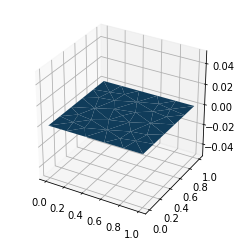

In [344]:
plotting.plot(mesh)